In [2]:
import pandas as pd

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#ribozyme hits:perhaps filter out duplicates like we did for others



In [4]:
small=pd.read_csv("taxonomy_contigs_with_ribo.tsv",sep="\t")

In [6]:
big=pd.read_csv("taxonomy_allcontigs.tsv",sep="\t",low_memory=False)

In [14]:
#value counts: how often do all the taxonomoic groups exist
bigc=big["taxonomy"].value_counts()
smallc=small["taxonomy"].value_counts()

In [24]:
#creates a datafraem which we will use for plotting
graph_df_small=pd.DataFrame(columns=["Tax","counts_small"])
graph_df_big=pd.DataFrame(columns=["Tax","counts_big"])

In [25]:
graph_df_small["Tax"]=smallc.index
graph_df_small["counts_small"]=smallc.values

In [26]:
graph_df_big["Tax"]=bigc.index
graph_df_big["counts_big"]=bigc.values

In [31]:
graph_df_comb=graph_df_big.merge(graph_df_small,on="Tax",how="outer")

In [82]:
#replace nans with 0

graph_df_comb["counts_small"]=graph_df_comb['counts_small'].fillna(0)

In [83]:
#setd datatype to int
graph_df_comb["counts_big"]=graph_df_comb["counts_big"].astype(int)

In [84]:
#sort values with the small dataset
graph_df_comb.sort_values(by=["counts_small"],ascending=False,inplace=True)

In [85]:
graph_df_comb.reset_index(drop=True,inplace=True)

In [86]:
#select the "rest"
graph_rest=graph_df_comb.iloc[8:]

nan

In [87]:
#select the top 9 viruses found with ribos
graph=graph_df_comb.iloc[:9]

In [88]:
graph.loc[10,"Tax"]="Other"
graph.loc[10,"counts_big"]=sum(graph_rest["counts_big"])
graph.loc[10,"counts_small"]=sum(graph_rest["counts_small"])

/mnt/mnemo6/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
help(plt)

/mnt/mnemo6/lukas/anaconda3/lib/python3.7/pydoc.py:1053: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return cram(stripid(repr(x)), self.maxother)
/mnt/mnemo6/lukas/anaconda3/lib/python3.7/pydoc.py:1053: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return cram(stripid(repr(x)), self.maxother)


Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, optional, default: `mlab.detrend_none`
            *x* is detrended by the *detrend* callable. This must be a
            function ``x = detrend(x)`` accepting and returning an
            `numpy.array`. Default is no normalization.
        
        normed : bool

/mnt/mnemo6/lukas/anaconda3/lib/python3.7/pydoc.py:1053: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return cram(stripid(repr(x)), self.maxother)


In [143]:
df1str=graph.to_csv(sep="\t",index=False)
f= open("top10_viral_taxonomies.csv","w+")
f.write(df1str)
f.close()

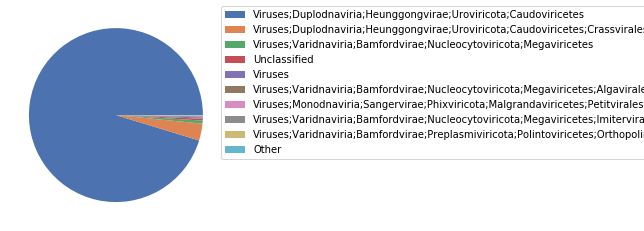

In [141]:
fig, ax = plt.subplots()
ax.pie(graph["counts_small"], labels=['','','','','','','','','',''], colors=sns.color_palette('deep'),)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
fig.legend(loc='upper left',labels=graph["Tax"],bbox_to_anchor=(0.5, 0.8))
plt.plot()

plt.savefig("ribotax.svg",bbox_inches="tight")

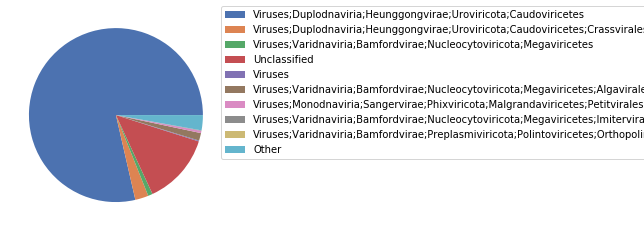

In [142]:
fig, ax = plt.subplots()
ax.pie(graph["counts_big"], labels=['','','','','','','','','',''], colors=sns.color_palette('deep'),)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
fig.legend(loc='upper left',labels=graph["Tax"],bbox_to_anchor=(0.5, 0.8))
plt.plot()

plt.savefig("alltax.svg",bbox_inches="tight")

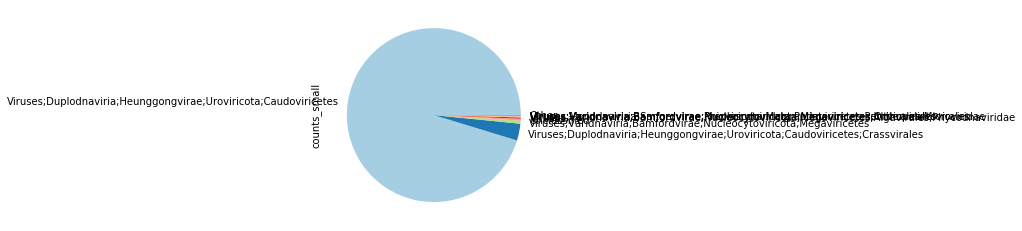

In [92]:
graph["counts_small"].plot(kind="pie",cmap="Paired",labels=graph["Tax"])

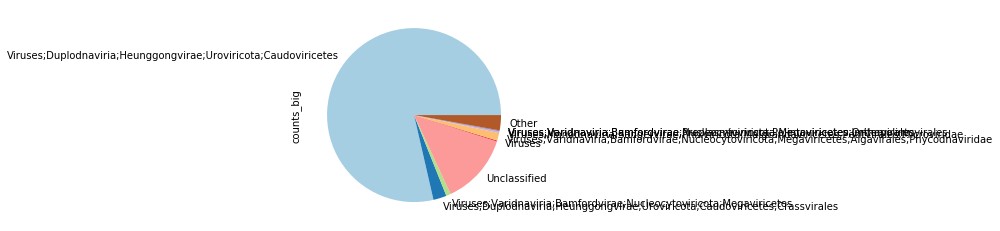

In [93]:
graph["counts_big"].plot(kind="pie",cmap="Paired",labels=graph["Tax"])

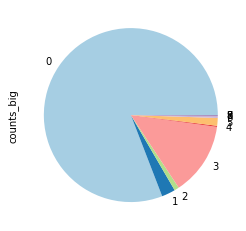

In [91]:
graph_df_comb.loc[:9,"counts_big"].plot(kind="pie",cmap="Paired")

In [ ]:
#now let's do the same thing with only theta ribozymes

In [150]:
thetas=pd.read_csv("../analysis/tables_and_result/comb_trna_v2_plus_ribo.csv",sep="\t")

In [153]:
len(thetas["ID"].unique())

682

In [159]:
cnt=0
indi=[]
for x in range(len(small)):
    if small.iloc[x,0] in thetas["ID"].unique():
        cnt+=1
        indi.append(x)

In [163]:
theta_virs=small.loc[indi]

In [164]:
big=pd.read_csv("taxonomy_allcontigs.tsv",sep="\t",low_memory=False)

In [165]:
#value counts: how often do all the taxonomoic groups exist
bigc=big["taxonomy"].value_counts()
smallc=theta_virs["taxonomy"].value_counts()

In [166]:
#creates a datafraem which we will use for plotting
graph_df_small=pd.DataFrame(columns=["Tax","counts_small"])
graph_df_big=pd.DataFrame(columns=["Tax","counts_big"])

In [167]:
graph_df_small["Tax"]=smallc.index
graph_df_small["counts_small"]=smallc.values

In [168]:
graph_df_big["Tax"]=bigc.index
graph_df_big["counts_big"]=bigc.values

In [169]:
graph_df_comb=graph_df_big.merge(graph_df_small,on="Tax",how="outer")

In [170]:
#replace nans with 0

graph_df_comb["counts_small"]=graph_df_comb['counts_small'].fillna(0)

In [171]:
#setd datatype to int
graph_df_comb["counts_big"]=graph_df_comb["counts_big"].astype(int)

In [172]:
#sort values with the small dataset
graph_df_comb.sort_values(by=["counts_small"],ascending=False,inplace=True)

In [173]:
graph_df_comb.reset_index(drop=True,inplace=True)

In [174]:
#select the "rest"
graph_rest=graph_df_comb.iloc[8:]

nan

In [180]:
#select the top 9 viruses found with ribos
graph=graph_df_comb.iloc[:7]

In [181]:
graph

,Tax,counts_big,counts_small
0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,3242857,645.0
1,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,101891,16.0
2,Viruses;Varidnaviria;Bamfordvirae;Nucleocytovi...,35057,4.0
3,Viruses,6847,3.0
4,Viruses;Varidnaviria;Bamfordvirae;Nucleocytovi...,58209,2.0
5,Unclassified,544162,1.0
6,Viruses;Varidnaviria;Bamfordvirae;Nucleocytovi...,115,1.0


In [182]:
graph.loc[10,"Tax"]="Other"
graph.loc[10,"counts_big"]=sum(graph_rest["counts_big"])
graph.loc[10,"counts_small"]=sum(graph_rest["counts_small"])

/mnt/mnemo6/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
graph

,Tax,counts_big,counts_small
0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,3242857.0,645.0
1,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,101891.0,16.0
2,Viruses;Varidnaviria;Bamfordvirae;Nucleocytovi...,35057.0,4.0
3,Viruses,6847.0,3.0
4,Viruses;Varidnaviria;Bamfordvirae;Nucleocytovi...,58209.0,2.0
5,Unclassified,544162.0,1.0
6,Viruses;Varidnaviria;Bamfordvirae;Nucleocytovi...,115.0,1.0
10,Other,136912.0,0.0


In [184]:
df1str=graph.to_csv(sep="\t",index=False)
f= open("top10_viral_taxonomies_thetas.csv","w+")
f.write(df1str)
f.close()

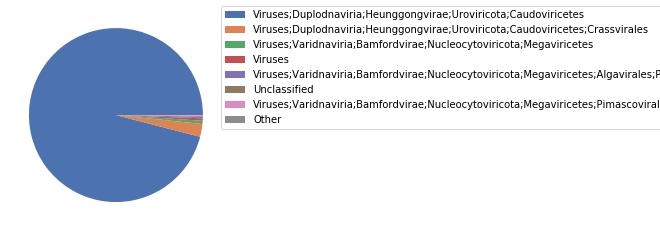

In [188]:
fig, ax = plt.subplots()
ax.pie(graph["counts_small"], labels=['','','','','','','',''], colors=sns.color_palette('deep'),)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
fig.legend(loc='upper left',labels=graph["Tax"],bbox_to_anchor=(0.5, 0.8))
plt.plot()

plt.savefig("ribotax_thetas.png",bbox_inches="tight")